In [137]:
#sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc, roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

In [138]:
#load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from math import sqrt
import seaborn as sns
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [139]:
#normalization data
df = pd.read_csv('Feature/advanced_feature.csv')
def normalize(dataset):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))*1
    dataNorm["Level"]=dataset["Level"]
    return dataNorm

df=normalize(df)
#df

In [140]:
df.isnull().sum()

EnergyDCTDelta          0
EnergyIDCTDelta         0
EnergyFFTDelta          0
EnergyIFFTDelta         0
EnergyDWTcADelta        0
EnergyDWTcDDelta        0
EnergySTFTDelta         0
EnergyWVDDelta          0
EnergyDCTTheta          0
EnergyIDCTTheta         0
EnergyFFTTheta          0
EnergyIFFTTheta         0
EnergyDWTcATheta        0
EnergyDWTcDTheta        0
EnergySTFTTheta         0
EnergyWVDTheta          0
EnergyDCTAlphaLow       0
EnergyIDCTAlphaLow      0
EnergyFFTAlphaLow       0
EnergyIFFTAlphaLow      0
EnergyDWTcAAlphaLow     0
EnergyDWTcDAlphaLow     0
EnergySTFTAlphaLow      0
EnergyWVDAlphaLow       0
EnergyDCTAlphaHigh      0
EnergyIDCTAlphaHigh     0
EnergyFFTAlphaHigh      0
EnergyIFFTAlphaHigh     0
EnergyDWTcAAlphaHigh    0
EnergyDWTcDAlphaHigh    0
                       ..
EnergyIFFTBetaLow       0
EnergyDWTcABetaLow      0
EnergyDWTcDBetaLow      0
EnergySTFTBetaLow       0
EnergyWVDBetaLow        0
EnergyDCTBetaHigh       0
EnergyIDCTBetaHigh      0
EnergyFFTBet

In [141]:
#test and train dataset split

df['split'] = np.random.randn(df.shape[0], 1)

msk = np.random.rand(len(df)) <= 0.7

train = df[msk]
test = df[~msk]

In [142]:
x = train.drop("Level", axis=1)
y = train["Level"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25,random_state=1)
#print(y_train)

In [143]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model. RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
   #tree.ExtraTreeClassifier(),
    
    xgb.XGBClassifier(),
    
    ]

In [144]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    #fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    #MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(y_test, predicted)
    #MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(y_test, predicted)
    #MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)





    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy
9,SGDClassifier,0.8077,0.8462
6,LogisticRegressionCV,0.8333,0.8077
16,LinearSVC,0.8718,0.8077
15,NuSVC,0.7564,0.7692
8,RidgeClassifierCV,0.7436,0.7692
7,PassiveAggressiveClassifier,0.6282,0.7692
18,XGBClassifier,1.0000,0.7692
5,GaussianProcessClassifier,0.9103,0.7692
10,Perceptron,0.7308,0.6923
2,ExtraTreesClassifier,1.0000,0.6923


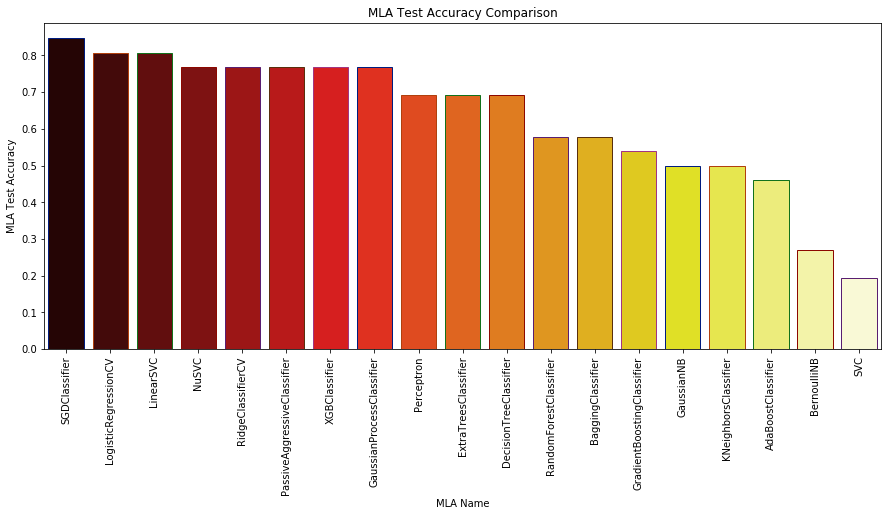

In [145]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()